In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [16]:
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [17]:
y_train = df_train.pop("Item_Outlet_Sales")

In [19]:
y_test = df_test.pop("Item_Outlet_Sales")

In [15]:
model = LinearRegression()

In [109]:
model.fit(df_train, y_train)

LinearRegression()

In [110]:
model.coef_

array([-3.84197604e+00,  9.83065945e+00,  1.61711856e+01,  6.09197622e+01,
       -8.64161561e+01,  1.23593376e+02,  2.34714039e+02, -2.44597425e+02,
       -2.72938329e+01, -8.09611456e+00, -3.01147840e+02,  1.70727611e+02,
       -5.40194744e+01,  7.34248834e+01,  1.70313375e+00, -5.07701615e+01,
        1.63553657e+02, -5.85286125e+01,  1.04913492e+02, -6.01944874e+01,
        1.98948206e+02, -1.40959023e+02,  1.19426257e+02,  2.66382669e+01,
       -1.85619792e+02,  1.43925357e+03,  2.16134663e+02,  3.54723990e+01,
        3.54832996e+02, -5.54559635e+00, -3.49287400e+02, -1.39202954e+03,
       -2.57982359e+02, -9.59016062e+02,  2.60902796e+03])

In [111]:
model.intercept_

-121926.97473298413

In [112]:
predict_test = model.predict(df_test)

In [113]:
mean_squared_error(y_test, predict_test)

1018589.0408245042

In [114]:
r2_score(y_test, predict_test)

0.5591989970389861

In [115]:
x = model.predict(df_test.iloc[:2])

In [116]:
x

array([1615.37962439, 3168.60806673])

In [117]:
y_test[:2]

0    1713.7692
1    3361.6242
Name: Item_Outlet_Sales, dtype: float64

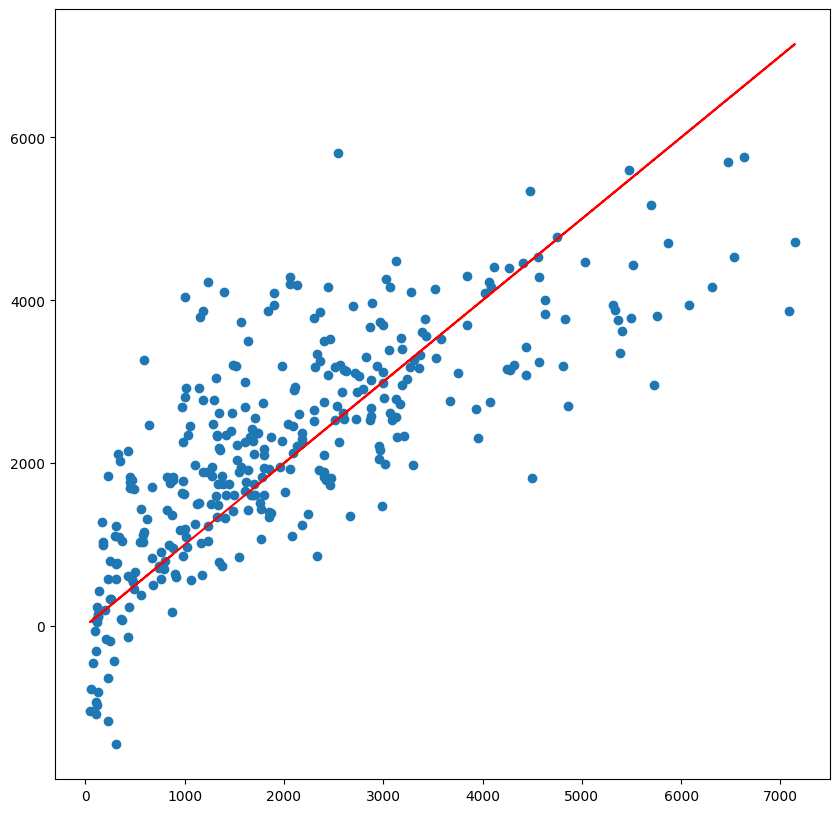

In [118]:
fig = plt.figure(figsize=(10,10))

plt.scatter(y_test, predict_test)
plt.plot(y_test,y_test, color="red")

plt.show()

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
x_train_stand  = df_train.copy()
y_train_stand = y_train.copy()

In [122]:
x_test_stand  = df_test.copy()
y_test_stand = y_test.copy()

In [123]:
#num_col = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]
num_col = list(df_train.columns)

In [124]:
for i in num_col:
    scale = StandardScaler().fit(x_train_stand[[i]])
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [125]:
x_train_stand

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-1.447304,-0.543949,-1.510886,0.746399,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,3.444985,...,-0.355446,-0.684285,1.557927,-0.638464,1.439469,-0.791040,-0.376062,0.705164,-0.343559,-0.338200
1,0.622171,2.035044,-0.454354,-0.102614,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,-0.290277,...,-0.355446,-0.684285,1.557927,1.566258,-0.694700,-0.791040,-0.376062,0.705164,-0.343559,-0.338200
2,-0.010059,-0.215040,-0.566411,-1.558066,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,-0.290277,...,-0.355446,1.461380,-0.641879,-0.638464,-0.694700,1.264158,-0.376062,-1.418111,-0.343559,2.956832
3,-0.271466,0.617063,-0.986859,0.018673,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,-0.290277,...,-0.355446,-0.684285,-0.641879,-0.638464,-0.694700,1.264158,2.659136,-1.418111,-0.343559,-0.338200
4,1.151298,-0.370058,-0.290296,0.746399,-0.20498,-1.205503,1.383665,-0.112342,-0.108947,-0.290277,...,-0.355446,-0.684285,1.557927,-0.638464,1.439469,-0.791040,-0.376062,0.705164,-0.343559,-0.338200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,-1.172157,-0.847663,-0.596167,0.503824,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,-0.290277,...,-0.355446,-0.684285,-0.641879,-0.638464,1.439469,-0.791040,-0.376062,0.705164,-0.343559,-0.338200
1360,0.198870,0.603676,-1.410579,1.110262,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,-0.290277,...,-0.355446,-0.684285,-0.641879,-0.638464,1.439469,-0.791040,-0.376062,0.705164,-0.343559,-0.338200
1361,-0.010059,-1.059763,0.312760,-1.558066,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,-0.290277,...,-0.355446,-0.684285,1.557927,1.566258,-0.694700,-0.791040,2.659136,-1.418111,-0.343559,-0.338200
1362,1.186573,-0.964054,0.255471,0.503824,-0.20498,0.829529,-0.722718,-0.112342,-0.108947,-0.290277,...,-0.355446,-0.684285,-0.641879,-0.638464,1.439469,-0.791040,-0.376062,0.705164,-0.343559,-0.338200


In [126]:
df_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,7.970000,0.021579,105.9596,2002,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1360,13.800000,0.097611,54.8930,2007,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1361,12.911575,0.010468,162.9526,1985,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
1362,18.000000,0.015482,159.3604,2002,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [127]:
model1 = LinearRegression()

In [128]:
model1.fit(x_train_stand, y_train)

LinearRegression()

In [129]:
predict_stand = model1.predict(x_test_stand)

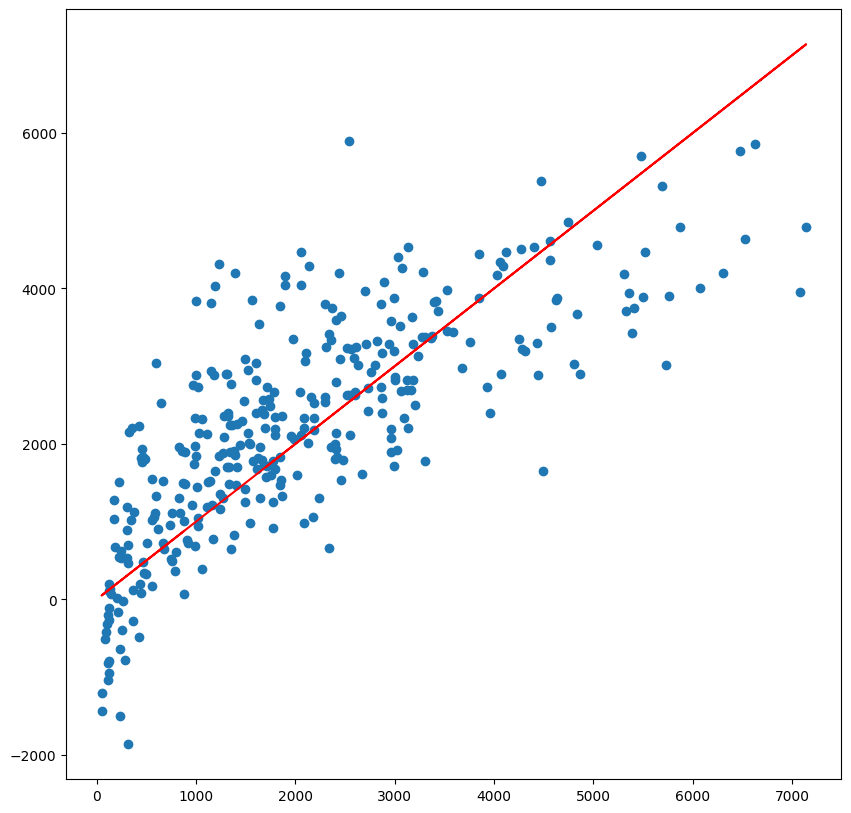

In [130]:
fig = plt.figure(figsize=(10,10))

plt.scatter(y_test, predict_stand)
plt.plot(y_test,y_test, color="red")

plt.show()

In [131]:
mean_squared_error(y_test,predict_stand)

1057441.8503649666